In [1]:
import pandas
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pandas.read_csv("student-mat.csv",sep=",", encoding='cp1252')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data["sex"].dtype

dtype('O')

In [3]:
list1=[]
for columns in data:
    if data[columns].dtype=="O":
        list1.append(columns)

In [4]:
for column in list1:
    mydict={}
    unique=data[column].unique()
    for i in range(len(unique)):
        d={unique[i]:i}
        mydict.update(d)
    data[column.upper()]=data[column].replace(mydict)

In [5]:
ndata=data.drop((column for column in list1), axis=1)
ndata.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,REASON,GUARDIAN,SCHOOLSUP,FAMSUP,PAID,ACTIVITIES,NURSERY,HIGHER,INTERNET,ROMANTIC
0,18,4,4,2,2,0,4,3,4,1,...,0,0,0,0,0,0,0,0,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,1,1,0,0,1,0,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,0,1,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,2,0,1,1,1,1,0,0,1,1
4,16,3,3,1,2,0,4,3,2,1,...,2,1,1,1,1,0,0,0,0,0


In [9]:
ndata.shape

(395, 33)

In [21]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
age           395 non-null int64
Medu          395 non-null int64
Fedu          395 non-null int64
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
SCHOOL        395 non-null int64
SEX           395 non-null int64
ADDRESS       395 non-null int64
FAMSIZE       395 non-null int64
PSTATUS       395 non-null int64
MJOB          395 non-null int64
FJOB          395 non-null int64
REASON        395 non-null int64
GUARDIAN      395 non-null int64
SCHOOLSUP     395 non-null int64
FAMSUP        395 non-null int64
PAID

In [47]:
predict_school=ndata.iloc[380:395,[17,0,9,10,12,15,5,30]]
predict_fam=ndata.iloc[380:395,[17,0,9,10,19,20,1,2,21,22]]
predict_pers=ndata.iloc[380:395,[17,0,9,10,32,6,11]]
predict_time=ndata.iloc[380:395,[17,0,9,10,3,4,7,8,28,29,27]]
predict_money=ndata.iloc[380:395,[17,0,9,10,25,26]]
predict_most=ndata.iloc[380:395,[17,0,9,10,20,32,6,3,7,8,25,26]]
#predict_school=ndata.iloc[:,[["SEX"],["age"],["Dalc"],["Walc"],["absences"],["G3"],["failures"],["HIGHER"], axis=1]]
#predict_fam=ndata.iloc[:,[["SEX"],["age"],["Dalc"],["Walc"],["FAMSIZE"],["PSTATUS"],["Medu"],["Fedu"],["MJOB"],["FJOB"]]]
#predict_pers=ndata.iloc[:,[["SEX"],["age"],["Dalc"],["Walc"],["ROMANTIC"],["famrel"],["health"]]]
#predict_time=ndata.iloc[:,[["SEX"],["age"],["Dalc"],["Walc"],["studytime"],["traveltime"],["freetime"],["goout"],["ACTIVITIES"],["NURSERY"],["PAID"]]]
#predict_money=ndata.iloc[:,[["SEX"],["age"],["Dalc"],["Walc"],["SCHOOLSUP"],["FAMSUP"]]]

In [48]:
data_school=ndata.iloc[0:380,[17,0,9,10,12,15,5,30]]
data_fam=ndata.iloc[0:380,[17,0,9,10,19,20,1,2,21,22]]
data_pers=ndata.iloc[0:380,[17,0,9,10,32,6,11]]
data_time=ndata.iloc[0:380,[17,0,9,10,3,4,7,8,28,29,27]]
data_money=ndata.iloc[0:380,[17,0,9,10,25,26]]
data_most=ndata.iloc[0:380,[17,0,9,10,20,32,6,3,7,8,25,26]]

In [36]:
from sklearn import preprocessing

# нормализация данных [0,1]
norm = preprocessing.MinMaxScaler()
norm.fit(data_most)

#Преобразование данных
X = norm.transform(data_most)
X = pandas.DataFrame(X, index=data_most.index, columns=data_most.columns)

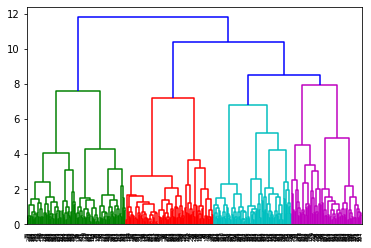

In [37]:
link = linkage(X, 'ward', 'euclidean')
dn = dendrogram(link)

In [49]:
model = KMeans(n_clusters=3, init="random", random_state=42, max_iter=300, n_init=10)
model.fit(data_most)
model.labels_

array([2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2,
       2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0,
       0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0,
       1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,

In [43]:
data_most["cluster"]=model.labels_
data_most.groupby('cluster').mean()

,SEX,age,Dalc,Walc,PSTATUS,ROMANTIC,famrel,traveltime,freetime,goout,SCHOOLSUP,FAMSUP
cluster,,,,,,,,,,,,
0,0.648148,16.787037,2.296296,3.907407,0.888889,0.305556,3.805556,1.574074,3.666667,4.074074,0.888889,0.583333
1,0.343434,17.898990,1.121212,1.666667,0.939394,0.474747,4.212121,1.373737,3.161616,3.050505,0.959596,0.606061
2,0.421965,15.803468,1.132948,1.595376,0.872832,0.289017,3.884393,1.387283,2.988439,2.554913,0.797688,0.670520


In [44]:
data_most.groupby('cluster').size()

cluster
0    108
1     99
2    173
dtype: int64

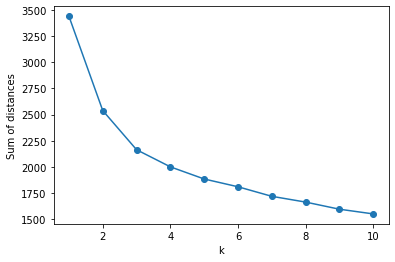

In [45]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(data_most) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.show()

In [50]:
model.predict(predict_most)

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2], dtype=int32)

In [51]:
predict_most.head()

,SEX,age,Dalc,Walc,PSTATUS,ROMANTIC,famrel,traveltime,freetime,goout,SCHOOLSUP,FAMSUP
380,1,18,1,4,1,0,3,1,2,4,1,0
381,1,18,1,3,1,1,4,2,4,3,1,0
382,1,17,1,1,1,0,4,2,4,3,1,0
383,1,19,1,3,1,0,4,2,3,2,1,0
384,1,18,4,3,1,0,5,2,4,3,1,0
